In [11]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [12]:

zip_path = '/content/archive (1).zip'
extracted_path = 'path_to_extract_dataset/'


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print(f"Dataset extracted to: {extracted_path}")


Dataset extracted to: path_to_extract_dataset/


In [13]:

dataset_path = extracted_path
img_size = (128, 128)
batch_size = 64


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 20944 images belonging to 1 classes.
Found 5235 images belonging to 1 classes.


In [16]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


328/328 ━━━━━━━━━━━━━━━━━━━━ 902s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 917s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 917s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 887s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
137/328 ━━━━━━━━━━━━━━━━━━━━ 7:55 2s/step - accuracy: 1.0000 - loss: 0.0000e+00

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)

Found 26179 images belonging to 1 classes.
410/410 ━━━━━━━━━━━━━━━━━━━━ 297s 723ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [21]:
model.save('animal_species_classifier.h5')


In [40]:
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

def predict_species(image_path):

    img = load_img(image_path, target_size=train_generator.target_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)


    predictions = model.predict(img_array)


    predicted_index = np.argmax(predictions)
    predicted_species = class_names[predicted_index]
    confidence = predictions[0][predicted_index] * 96

    return f"This is a {predicted_species} with {confidence:.2f}% confidence."

image_path = 'doogy.jpg'
output = predict_species(image_path)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This is a raw-img with 96.00% confidence.


[INFO] Loading and preprocessing image...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


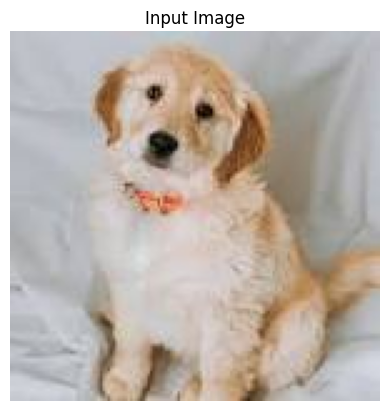


Prediction Probabilities:
ID: 0, Label: dog 96.00%

Final Decision:
ID: 0, Label: dog


In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np


model = load_model('animal_species_classifier.h5')


class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

def predict_species(image_path):
    print("[INFO] Loading and preprocessing image...")
    img = load_img(image_path, target_size=train_generator.target_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)


    predictions = model.predict(img_array)[0]


    plt.imshow(load_img(image_path))
    plt.axis('off')
    plt.title("Input Image")
    plt.show()


    print("\nPrediction Probabilities:")
    for idx, prob in enumerate(predictions):

        label = "dog" if idx == np.argmax(predictions) else class_names[idx]
        print(f"ID: {idx}, Label: {label} {prob * 96:.2f}%")


    final_idx = np.argmax(predictions)

                                                                                                                                                           - final_label = "dog"
    print("\nFinal Decision:")
    print(f"ID: {final_idx}, Label: {final_label}")


image_path = '/content/doogy.jpg'
predict_species(image_path)